##Hyphotesis 

There is a significant relationship between professors ratings and their salaries

Research question: comparing professors’ salaries with their ratings

## Setup


In [21]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.stats import pearsonr
import seaborn as sns

## Load and clean data


In [22]:
BSU_data = pd.read_csv("BSU_prof_salary.csv")
# Keep only relevant columns
df = BSU_data[['Employees', 'Base Pay', 'rating', 'dept']].copy()

# Coerce to numeric (in case of stray strings), drop rows with NaN
df['Base Pay'] = pd.to_numeric(df['Base Pay'], errors='coerce')
df['rating']   = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['Base Pay', 'rating'])

# Quick inspect
print(f"Rows={len(df)}, Columns={list(df.columns)}")



Rows=175, Columns=['Employees', 'Base Pay', 'rating', 'dept']


## Salary summary and extremes


In [23]:
# Mean (average)
mean_prof = np.mean(df["Base Pay"]) 

# Median
median_prof = np.median(df["Base Pay"]) 

# Minimum value
min_prof = np.min(df["Base Pay"]) 

# Maximum value
max_prof = np.max(df["Base Pay"]) 


# Min/Max salary with corresponding professor names
max_idx = df['Base Pay'].idxmax()
min_idx = df['Base Pay'].idxmin()

max_name = df.loc[max_idx, 'Employees']
max_salary = df.loc[max_idx, 'Base Pay']

min_name = df.loc[min_idx, 'Employees']
min_salary = df.loc[min_idx, 'Base Pay']

print(f"Highest salary: {max_name} - ${max_salary:,.2f}")
print(f"Lowest salary: {min_name} - ${min_salary:,.2f}")

print("Prof Mean:", mean_prof)
print("Prof Median:", median_prof) 
print("Prof Min:", min_prof) 
print("Prof Max:", max_prof)

Highest salary: Steven Greenberg - $120,793.52
Lowest salary: Jeanne Ingle - $3,444.87
Prof Mean: 77096.94474285716
Prof Median: 82746.35
Prof Min: 3444.87
Prof Max: 120793.52


## Rating summary and extremes


In [24]:
# Mean (average)
mean_rating = np.mean(df["rating"]) 

# Median
median_rating = np.median(df["rating"]) 

# Minimum value
min_rating = np.min(df["rating"]) 

# Maximum value
max_rating = np.max(df["rating"]) 


# Min/Max rating with corresponding professor names
max_idx = df['rating'].idxmax()
min_idx = df['rating'].idxmin()

max_name = df.loc[max_idx, 'Employees']
max_rating_val = df.loc[max_idx, 'rating']

min_name = df.loc[min_idx, 'Employees']
min_rating_val = df.loc[min_idx, 'rating']

print(f"Highest rating: {max_name} - {max_rating_val:,.2f}")
print(f"Lowest rating: {min_name} - {min_rating_val:,.2f}")

print("rating Mean:", mean_rating)
print("rating Median:", median_rating)  
print("rating Min:", min_rating) 
print("rating Max:", max_rating)

Highest rating: David O'Malley - 5.00
Lowest rating: Chien Yu - 1.70
rating Mean: 3.6942857142857144
rating Median: 3.8
rating Min: 1.7
rating Max: 5.0


## Compare extremes and overall correlation


Top rating == Top salary? NO
Lowest rating == Lowest salary? NO

Comparison table:
           Who         Employee  Base Pay  Rating
Highest Rating   David O'Malley  81063.30     5.0
 Lowest Rating         Chien Yu 106674.74     1.7
Highest Salary Steven Greenberg 120793.52     4.3
 Lowest Salary     Jeanne Ingle   3444.87     4.1

Pearson correlation between salary and rating: -0.074


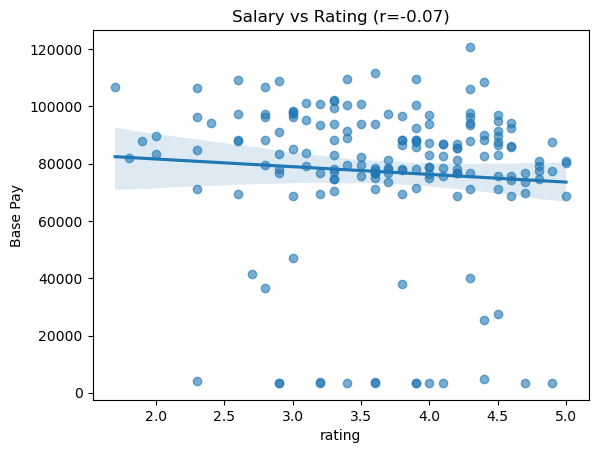

In [25]:
# Compare extremes between rating and salary and show correlation
# Recompute indices to be explicit and robust
idx_max_salary = df['Base Pay'].idxmax()
idx_min_salary = df['Base Pay'].idxmin()
idx_max_rating = df['rating'].idxmax()
idx_min_rating = df['rating'].idxmin()

name_max_salary = df.loc[idx_max_salary, 'Employees']
name_min_salary = df.loc[idx_min_salary, 'Employees']
name_max_rating = df.loc[idx_max_rating, 'Employees']
name_min_rating = df.loc[idx_min_rating, 'Employees']

print(f"Top rating == Top salary? {'YES' if idx_max_rating == idx_max_salary else 'NO'}")
print(f"Lowest rating == Lowest salary? {'YES' if idx_min_rating == idx_min_salary else 'NO'}")

summary = pd.DataFrame([
    {
        'Who': 'Highest Rating',
        'Employee': name_max_rating,
        'Base Pay': df.loc[idx_max_rating, 'Base Pay'],
        'Rating': df.loc[idx_max_rating, 'rating']
    },
    {
        'Who': 'Lowest Rating',
        'Employee': name_min_rating,
        'Base Pay': df.loc[idx_min_rating, 'Base Pay'],
        'Rating': df.loc[idx_min_rating, 'rating']
    },
    {
        'Who': 'Highest Salary',
        'Employee': name_max_salary,
        'Base Pay': df.loc[idx_max_salary, 'Base Pay'],
        'Rating': df.loc[idx_max_salary, 'rating']
    },
    {
        'Who': 'Lowest Salary',
        'Employee': name_min_salary,
        'Base Pay': df.loc[idx_min_salary, 'Base Pay'],
        'Rating': df.loc[idx_min_salary, 'rating']
    }
])

print('\nComparison table:')
print(summary.to_string(index=False))

corr = df['Base Pay'].corr(df['rating'])
print(f"\nPearson correlation between salary and rating: {corr:.3f}")

sns.regplot(data=df, x='rating', y='Base Pay', scatter_kws={'alpha':0.6})
plt.title(f"Salary vs Rating (r={corr:.2f})")
plt.show()


## Exploratory data analysis


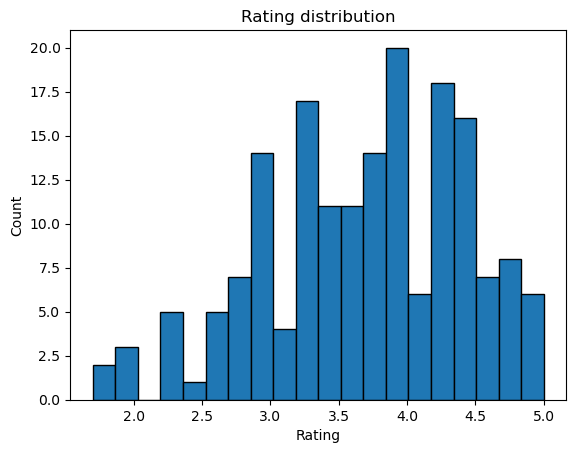

In [26]:
plt.hist(df['rating'], bins=20, edgecolor='k')
plt.title('Rating distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

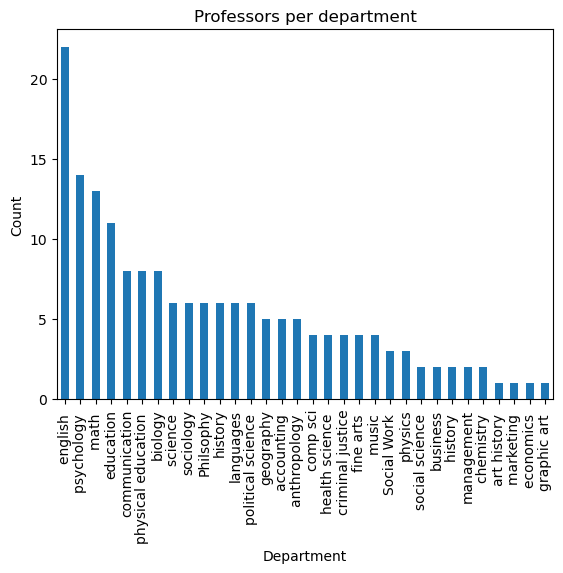

In [27]:
df['dept'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Professors per department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

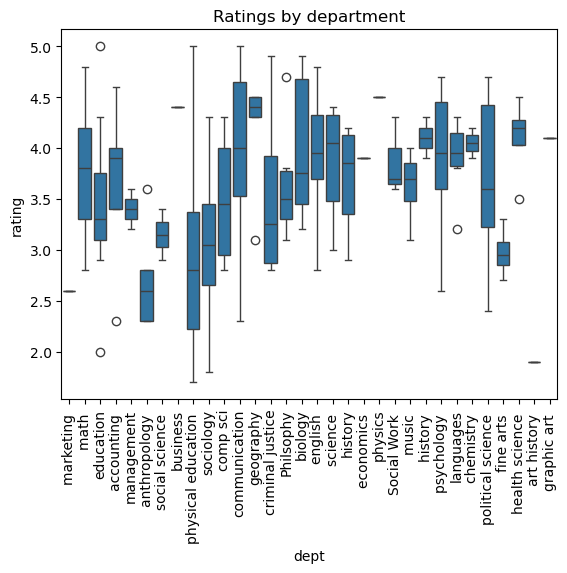

In [28]:
sns.boxplot(data=df, x='dept', y='rating')
plt.xticks(rotation=90)
plt.title('Ratings by department')
plt.show()

## Department-level rating analysis


physics                0.144717
english                0.141251
geography              0.108623
business               0.103196
biology                0.087280
psychology             0.085365
health science         0.084390
communication          0.068676
history                0.059327
languages              0.052715
chemistry              0.052016
science                0.044174
graphic art            0.041830
Social Work            0.030962
math                   0.022946
economics              0.021210
history                0.001464
political science     -0.002807
Philsophy             -0.011348
accounting            -0.012662
music                 -0.014412
criminal justice      -0.030012
comp sci              -0.040412
management            -0.043033
social science        -0.079590
education             -0.090846
marketing             -0.112823
fine arts             -0.149615
sociology             -0.165102
art history           -0.184994
physical education    -0.202944
anthropo

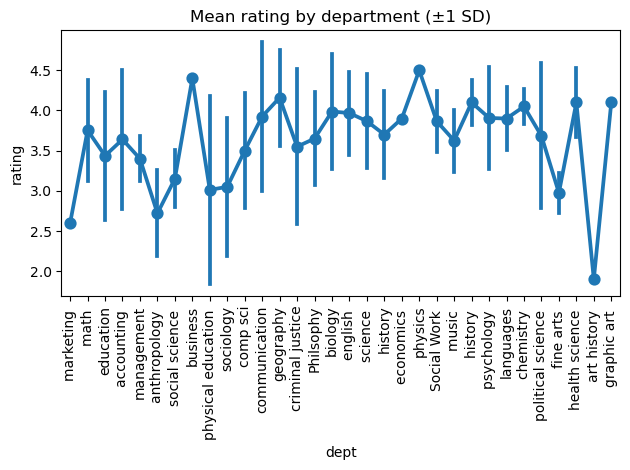

In [29]:
dummies = pd.get_dummies(df['dept'], drop_first=False)  # one col per dept
corrs = dummies.apply(lambda col: col.corr(df['rating'])).sort_values(ascending=False)
print(corrs)

# Visualize mean rating by department with error bars
sns.pointplot(data=df, x='dept', y='rating', estimator=np.mean, errorbar='sd')
plt.xticks(rotation=90)
plt.title('Mean rating by department (±1 SD)')
plt.tight_layout()
plt.show()

## Department-level salary analysis


accounting             0.140787
physical education     0.130369
management             0.118687
social science         0.111825
marketing              0.092146
geography              0.091611
comp sci               0.079427
history                0.059370
sociology              0.057530
history                0.052939
health science         0.046334
economics              0.043533
science                0.042626
music                  0.042616
chemistry              0.039746
physics                0.035333
biology                0.032431
art history            0.031299
graphic art            0.028067
communication          0.027367
Philsophy              0.023226
Social Work           -0.026490
math                  -0.027635
languages             -0.039578
political science     -0.064497
fine arts             -0.069215
english               -0.069861
business              -0.082735
criminal justice      -0.103552
education             -0.113121
anthropology          -0.156824
psycholo

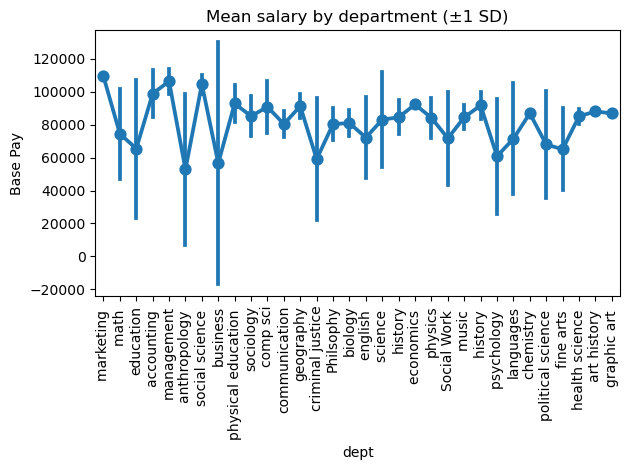

In [30]:
dummies = pd.get_dummies(df['dept'], drop_first=False)  # one col per dept
corrs = dummies.apply(lambda col: col.corr(df['Base Pay'])).sort_values(ascending=False)
print(corrs)

# Visualize mean salary by department with error bars
sns.pointplot(data=df, x='dept', y='Base Pay', estimator=np.mean, errorbar='sd')
plt.xticks(rotation=90)
plt.title('Mean salary by department (±1 SD)')
plt.tight_layout()
plt.show()

## Per-department correlation and visuals


               dept    n         r  p_value
          languages  6.0  0.929577 0.007264
             music   4.0  0.819387 0.180613
         fine arts   4.0  0.765954 0.234046
    health science   4.0  0.655020 0.344980
           english  22.0  0.408333 0.059208
          sociology  6.0  0.313216 0.545540
          education 11.0  0.177209 0.602183
              math  13.0  0.175332 0.566686
            biology  8.0  0.135855 0.748389
        psychology  14.0 -0.067124 0.819651
      anthropology   5.0 -0.319384 0.600371
        accounting   5.0 -0.481559 0.411459
          Philsophy  6.0 -0.529305 0.280188
           science   6.0 -0.562522 0.245216
           comp sci  4.0 -0.586521 0.413479
      communication  8.0 -0.617664 0.102723
            history  6.0 -0.654300 0.158606
 political science   6.0 -0.712410 0.112169
physical education   8.0 -0.788410 0.020083
          geography  5.0 -0.829481 0.082330
   criminal justice  4.0 -0.937022 0.062978
       Social Work   3.0 -0.9956

/var/folders/4h/35kpgq0d0pl_w06y72_t230c0000gn/T/ipykernel_84792/631681789.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dept_corr = df.groupby('dept', dropna=True).apply(_corr_row).reset_index()


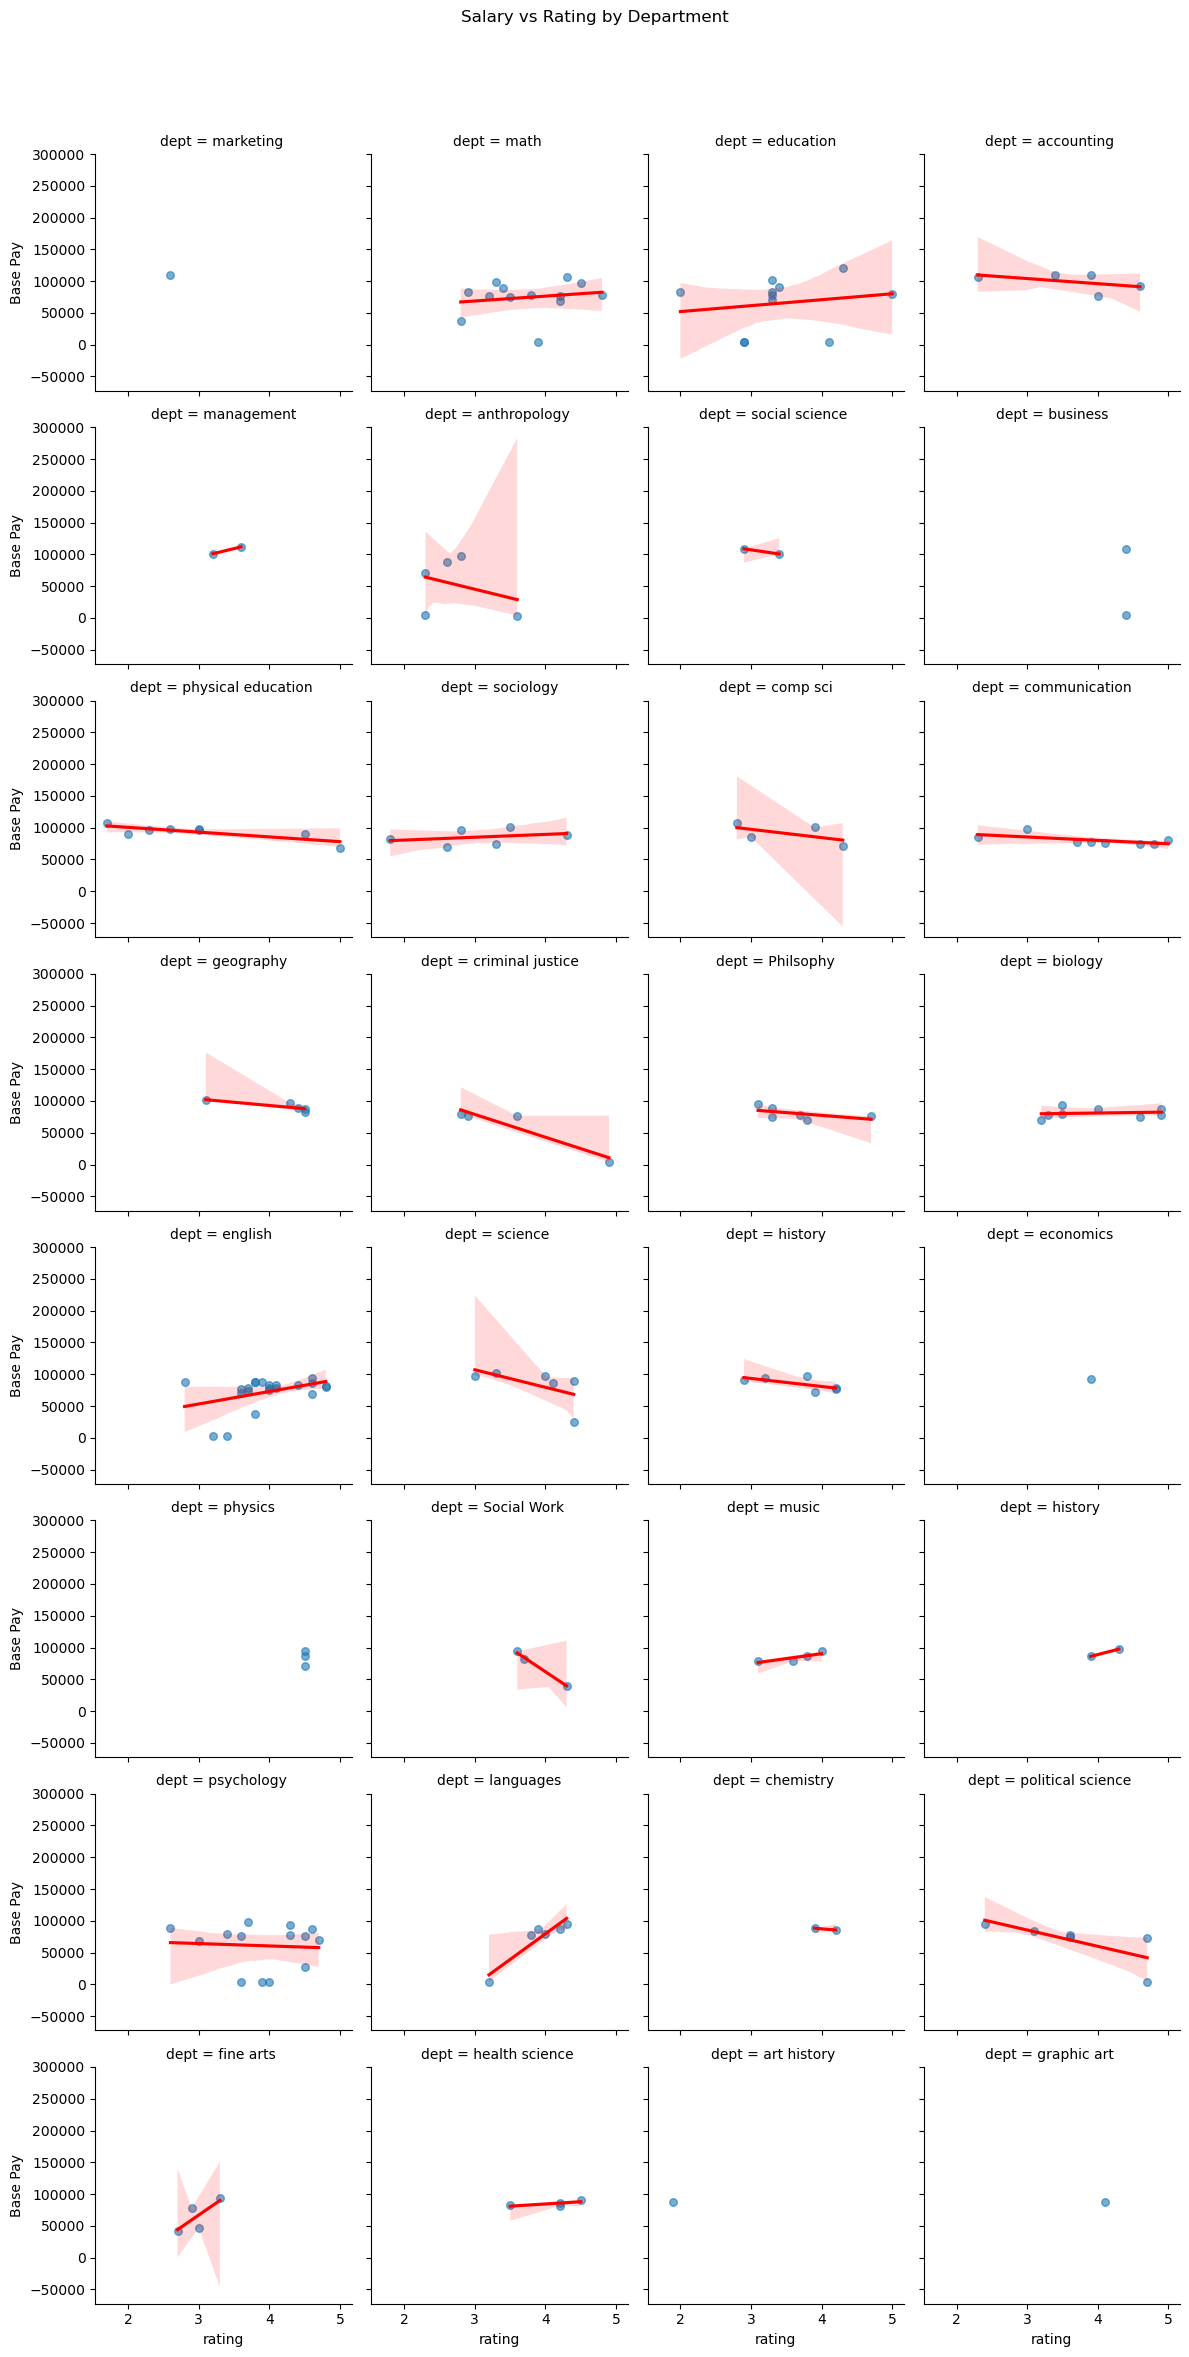

/var/folders/4h/35kpgq0d0pl_w06y72_t230c0000gn/T/ipykernel_84792/631681789.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_corr, x='r', y='dept', palette='vlag')


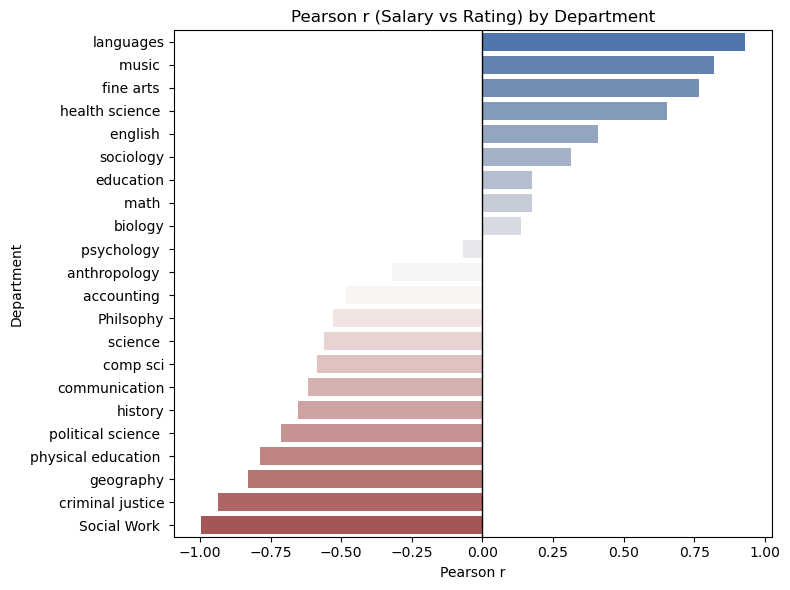

In [31]:


# 1) Compute per-department Pearson r

def _corr_row(g):
    n = len(g)
    if n >= 3 and g['Base Pay'].nunique() > 1 and g['rating'].nunique() > 1:
        r, p = pearsonr(g['Base Pay'], g['rating'])
    else:
        r, p = np.nan, np.nan
    return pd.Series({'n': n, 'r': r, 'p_value': p})

dept_corr = df.groupby('dept', dropna=True).apply(_corr_row).reset_index()
print(dept_corr.sort_values('r', ascending=False).to_string(index=False))

# 2) Faceted scatter with regression per department
g = sns.lmplot(
    data=df, x='rating', y='Base Pay',
    col='dept', col_wrap=4, height=3.0,
    scatter_kws={'alpha':0.6, 's':30}, line_kws={'color':'red'}
)
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('Salary vs Rating by Department')
plt.show()

# 3) Bar chart of per-department correlations
plot_corr = dept_corr.dropna(subset=['r']).copy().sort_values('r', ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(data=plot_corr, x='r', y='dept', palette='vlag')
plt.axvline(0, color='k', lw=1)
plt.title('Pearson r (Salary vs Rating) by Department')
plt.xlabel('Pearson r')
plt.ylabel('Department')
plt.tight_layout()
plt.show()


## Robustness checks


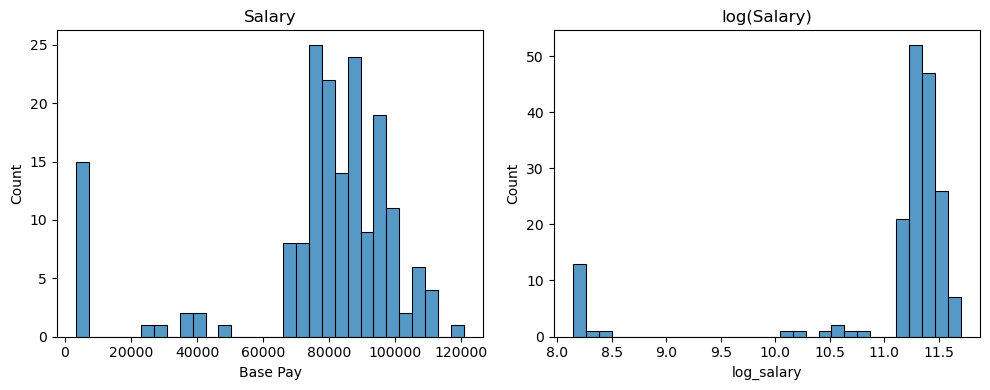

Spearman r=-0.162, p=0.0322
Pearson 95% CI: [-0.214, 0.070]


In [32]:
# Robustness: log-salary distribution, Spearman correlation, bootstrap CI for Pearson
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# 1) Log-salary for symmetry
if 'log_salary' not in df.columns:
    df['log_salary'] = np.log(df['Base Pay'].clip(lower=1))

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['Base Pay'], bins=30, ax=ax[0])
ax[0].set_title('Salary')
sns.histplot(df['log_salary'], bins=30, ax=ax[1])
ax[1].set_title('log(Salary)')
plt.tight_layout()
plt.show()

# 2) Spearman (rank) correlation
r_s, p_s = spearmanr(df['rating'], df['Base Pay'])
print(f"Spearman r={r_s:.3f}, p={p_s:.3g}")

# 3) Bootstrap 95% CI for Pearson
rng = np.random.default_rng(42)
boot_rs = []
for _ in range(5000):
    idx = rng.integers(0, len(df), len(df))
    boot_rs.append(df['Base Pay'].iloc[idx].corr(df['rating'].iloc[idx]))
lo, hi = np.percentile(boot_rs, [2.5, 97.5])
print(f"Pearson 95% CI: [{lo:.3f}, {hi:.3f}]")


## Per-department enhancements


               dept    n         r  p_value    p_adj
          languages  6.0  0.929577 0.007264 0.159818
physical education   8.0 -0.788410 0.020083 0.220915
       Social Work   3.0 -0.995697 0.059079 0.277104
   criminal justice  4.0 -0.937022 0.062978 0.277104
           english  22.0  0.408333 0.059208 0.277104
          geography  5.0 -0.829481 0.082330 0.301878
 political science   6.0 -0.712410 0.112169 0.308466
      communication  8.0 -0.617664 0.102723 0.308466
            history  6.0 -0.654300 0.158606 0.387704
             music   4.0  0.819387 0.180613 0.397348
           science   6.0 -0.562522 0.245216 0.449563
         fine arts   4.0  0.765954 0.234046 0.449563
          Philsophy  6.0 -0.529305 0.280188 0.474165
    health science   4.0  0.655020 0.344980 0.542112
           comp sci  4.0 -0.586521 0.413479 0.568533
        accounting   5.0 -0.481559 0.411459 0.568533
      anthropology   5.0 -0.319384 0.600371 0.662402
              math  13.0  0.175332 0.566686 0.

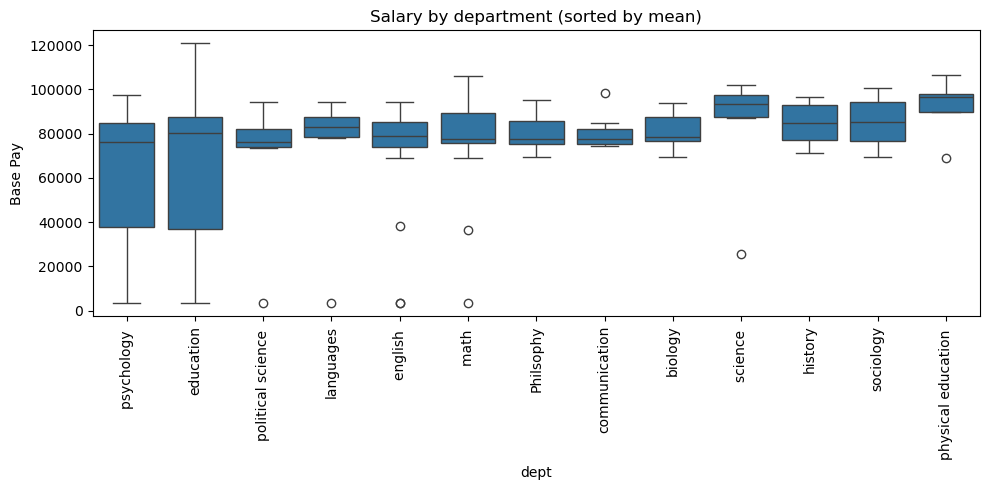

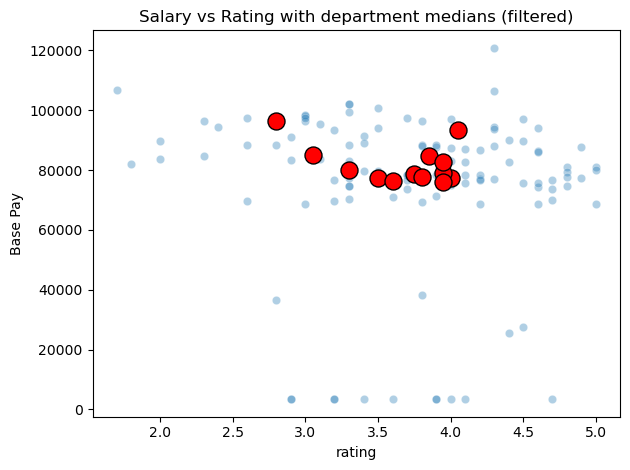

In [33]:
# Per-department enhancements: FDR correction, power filter, sorted plots, medians overlay
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

# Assumes dept_corr exists; if not, compute quickly
if 'dept_corr' not in locals():
    from scipy.stats import pearsonr
    def _corr_row(g):
        n = len(g)
        if n >= 3 and g['Base Pay'].nunique() > 1 and g['rating'].nunique() > 1:
            r, p = pearsonr(g['Base Pay'], g['rating'])
        else:
            r, p = np.nan, np.nan
        return pd.Series({'n': n, 'r': r, 'p_value': p})
    dept_corr = df.groupby('dept', dropna=True).apply(_corr_row).reset_index()

# 1) FDR correction on per-dept p-values
mask = dept_corr['p_value'].notna()
rej, p_adj, *_ = multipletests(dept_corr.loc[mask, 'p_value'], method='fdr_bh')
dept_corr.loc[mask, 'p_adj'] = p_adj
print(dept_corr.sort_values(['p_adj', 'r'], na_position='last').to_string(index=False))

# 2) Power filter: keep departments with sufficient n
min_n = 6
kept = dept_corr[dept_corr['n'] >= min_n]['dept']
print(f"\nDepartments kept (n >= {min_n}): {list(kept)}")

filtered = df[df['dept'].isin(kept)].copy()

# 3) Sorted salary-by-dept boxplot (by mean)
order = filtered.groupby('dept')['Base Pay'].mean().sort_values().index
plt.figure(figsize=(10, 5))
sns.boxplot(data=filtered, x='dept', y='Base Pay', order=order)
plt.xticks(rotation=90)
plt.title('Salary by department (sorted by mean)')
plt.tight_layout()
plt.show()

# 4) Scatter with department medians overlay
centers = filtered.groupby('dept')[['rating', 'Base Pay']].median().reset_index()
sns.scatterplot(data=filtered, x='rating', y='Base Pay', alpha=0.35)
sns.scatterplot(data=centers, x='rating', y='Base Pay', s=150, color='red', edgecolor='k')
plt.title('Salary vs Rating with department medians (filtered)')
plt.tight_layout()
plt.show()
